<a href="https://colab.research.google.com/github/chipojaya1/Power-Consumption-in-Morocco/blob/main/First_draft_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.3-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
print("Hello, R!")

[1] "Hello, R!"


In [ ]:
%%R
# install and load libraries
install.packages("dplyr")
install.packages("ggplot2")
install.packages("forecast")

library(dplyr)
library(ggplot2)
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB


The downloaded source packages are in
	‘/tmp/RtmpJkEA6i/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.5.1.tar.gz'
Content type 'application/x-gzip' length 3604371 bytes (3.4 MB)
downloaded 3.4 MB


The downloaded source packages are in
	‘/tmp/RtmpJkEA6i/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/forecast_8.23.0.tar.gz'
Content type 'application/x-gzip' length 590865 bytes (577 KB)
downloaded 577 KB


The downloaded source packages are in
	‘/tmp/RtmpJkEA6i/downloaded_packages’

Attaching package: ‘dplyr’

The following objects are mask

In [ ]:
%%R
print("############ Morocco Power Consumption Data Analysis Project   ###########")

[1] "############ Morocco Power Consumption Data Analysis Project   ###########"


In [ ]:
%%R

# load the data
power <- read.csv("PowerConsumption.csv", header=TRUE)
attach(power)
head(power)


       DateTime Temperature Humidity Wind.Speed general.diffuse.flows
1 1/1/2017 0:00       6.559     73.8      0.083                 0.051
2 1/1/2017 1:00       5.641     77.7      0.080                 0.048
3 1/1/2017 2:00       5.059     78.6      0.081                 0.070
4 1/1/2017 3:00       5.169     77.9      0.083                 0.066
5 1/1/2017 4:00       4.753     75.7      0.083                 0.044
6 1/1/2017 5:00       4.934     72.9      0.082                 0.055
  diffuse.flows    Total
1         0.119 70425.54
2         0.096 60937.36
3         0.096 54290.74
4         0.108 49783.65
5         0.134 47930.29
6         0.134 47592.72


In [ ]:
%%R

# summary statistics
summary(power)


   DateTime          Temperature        Humidity       Wind.Speed   
 Length:8736        Min.   : 3.541   Min.   :11.57   Min.   :0.050  
 Class :character   1st Qu.:14.418   1st Qu.:58.34   1st Qu.:0.078  
 Mode  :character   Median :18.805   Median :69.89   Median :0.086  
                    Mean   :18.810   Mean   :68.26   Mean   :1.958  
                    3rd Qu.:22.920   3rd Qu.:81.40   3rd Qu.:4.914  
                    Max.   :40.010   Max.   :94.70   Max.   :5.690  
 general.diffuse.flows diffuse.flows         Total       
 Min.   :   0.007      Min.   :  0.030   Min.   : 37538  
 1st Qu.:   0.062      1st Qu.:  0.122   1st Qu.: 56541  
 Median :   4.736      Median :  4.338   Median : 69764  
 Mean   : 182.602      Mean   : 75.206   Mean   : 71139  
 3rd Qu.: 317.475      3rd Qu.:100.975   3rd Qu.: 83553  
 Max.   :1163.000      Max.   :903.000   Max.   :133194  


In [ ]:
%%R

# Convert DateTime to POSIXct
power$DateTime <- as.POSIXct(power$DateTime, format="%m/%d/%Y %H:%M")


# Extract time components using base R
power$Hour <- as.numeric(format(power$DateTime, "%H"))
power$Weekday <- weekdays(power$DateTime)
power$Weekday <- factor(power$Weekday,
                       levels=c("Monday","Tuesday","Wednesday",
                                "Thursday","Friday","Saturday","Sunday"))
power$Month <- format(power$DateTime, "%B")
power$Month <- factor(power$Month,
                     levels=c("January","February","March",
                              "April","May","June","July",
                              "August","September","October",
                              "November","December"))

In [ ]:
%%R

#### 1. SETUP AND DATA LOADING (keep as is)

#### 2. TIME SERIES DECOMPOSITION (Enhanced)
# Decompose the time series
decomp <- decompose(ts(power$Total, frequency=24))

# Plot decomposition
plot(decomp, col="blue",
     main="Power Consumption Decomposition",

     xlab="Time (Days)")

# Seasonal subseries plot
monthplot(ts(power$Total, frequency=24*7),
          col="blue",
          main="Weekly Seasonal Patterns",
          ylab="Consumption",
          xlab="Hour of Week")

UsageError: Cell magic `%%R` not found.


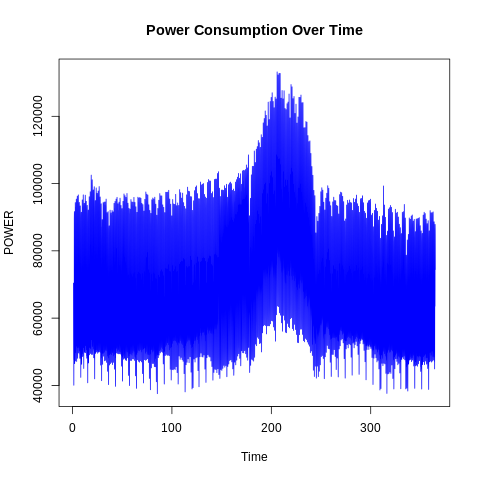

In [ ]:
%%R
# Create time series object (daily frequency with 24 seasonality)
POWER <- ts(power$Total, frequency=24)

# Plot time series
ts.plot(POWER, col = "blue", main = "Power Consumption Over Time")


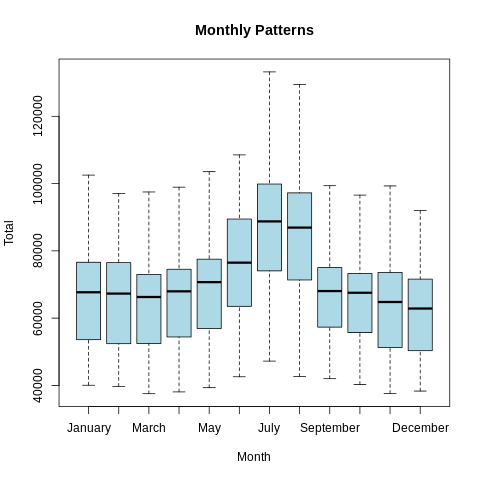

In [ ]:
%%R


# Boxplots (daily, weekly and  monthly patterns)
boxplot(Total ~ Weekday, data=power, col="lightblue", main="Weekly Patterns")
boxplot(Total ~ Hour, data=power, col="lightblue", main="Hourly Patterns")
boxplot(Total ~ Month, data=power, col="lightblue", main="Monthly Patterns")



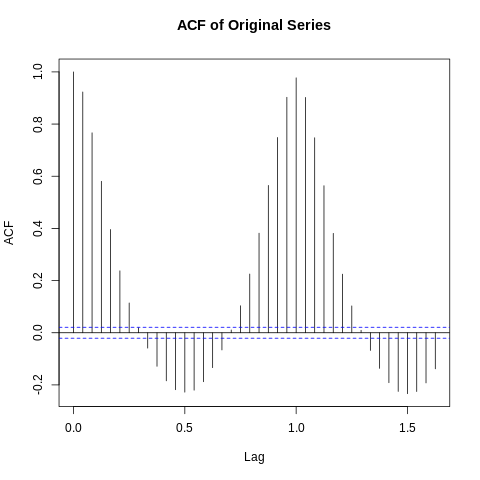

In [ ]:
%%R
# a Nonstationarity of the Original Series
# ACF Analysis:
acf(POWER, main="ACF of Original Series")
# ACF Analysis:
pacf(POWER, main="PACF of Original Series")


In [ ]:
# 5.2 Fitting model with Exponential Smoothing
# load library for exponential smotting



fitmodel <- ets(POWER, model="ZZZ")
plot(fitmodel)

NameError: name 'fitmodel' is not defined

Error in tslm(train ~ trend + season) : Not time series data, use lm()


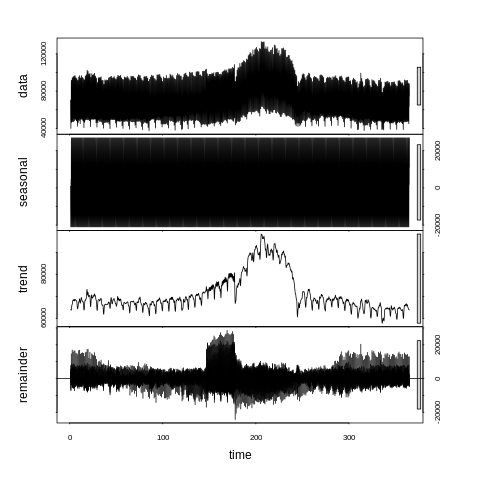

RInterpreterError: Failed to parse and evaluate line '#Seasonality checks\n# 5.1 Seasonal Decomposition\ndecomp <- stl(POWER, s.window="periodic")\nplot(decomp)\n\n# 5.2 Linear Models\n# Seasonal model with month and hour (friend\'s approach)\nseasonal_fit <- lm(Total ~ Month + as.factor(Hour), data=power[1:train_end,])\n\n# Trend-seasonal model\ntrend_seasonal_fit <- tslm(train ~ trend + season)\n\n# 5.3 Exponential Smoothing (your approach with friend\'s parameters)\nets_fit <- ets(train, model="AAA")\n\n# 5.4 ARIMA Models\n# Auto ARIMA\narima_fit <- auto.arima(train, stepwise=FALSE, approximation=FALSE)\n\n# ARIMAX with weather variables\nxreg <- cbind(power$Temperature, power$Humidity, power$Wind.Speed)\ncolnames(xreg) <- c("Temp", "Humidity", "WindSpeed")\narimax_fit <- auto.arima(train, xreg=xreg[1:train_end,], seasonal=TRUE)\n'.
R error message: 'Error in tslm(train ~ trend + season) : Not time series data, use lm()'

In [ ]:
%%R
#Seasonality checks
# 5.1 Seasonal Decomposition
decomp <- stl(POWER, s.window="periodic")
plot(decomp)

# 5.2 Linear Models
# Seasonal model with month and hour (friend's approach)
seasonal_fit <- lm(Total ~ Month + as.factor(Hour), data=power[1:train_end,])

# Trend-seasonal model
trend_seasonal_fit <- tslm(train ~ trend + season)

# 5.3 Exponential Smoothing (your approach with friend's parameters)
ets_fit <- ets(train, model="AAA")

# 5.4 ARIMA Models
# Auto ARIMA
arima_fit <- auto.arima(train, stepwise=FALSE, approximation=FALSE)

# ARIMAX with weather variables
xreg <- cbind(power$Temperature, power$Humidity, power$Wind.Speed)
colnames(xreg) <- c("Temp", "Humidity", "WindSpeed")
arimax_fit <- auto.arima(train, xreg=xreg[1:train_end,], seasonal=TRUE)

In [ ]:
%%R

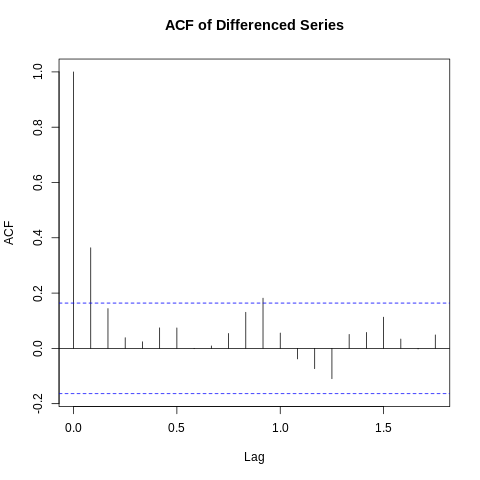

In [ ]:
%%R
# b First Differencing & Stationarity Check
# Take First Difference:
diff_EXCRATE <- diff(EXCRATE)
plot(diff_EXCRATE, main="First Difference of Exchange Rate")

# ACF of Differenced Series:
acf(diff_EXCRATE, main="ACF of Differenced Series")


# Interpretation: Stationarity Confirmation: ACF cuts off quickly (no significant spikes after lag 0 or 1), indicating stationarity.



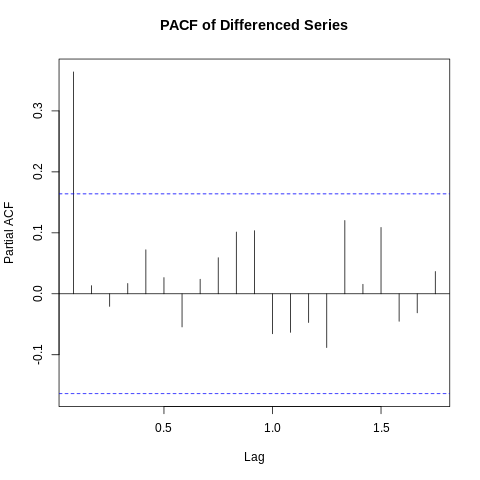

In [ ]:
%%R
# c Identify AR Order Using ACF/PACF
pacf(diff_EXCRATE, main="PACF of Differenced Series")

# Interpretation: AR Order Selection:
# PACF spikes at lags 1 and 2 → AR(2) model.
# If only lag 1 is significant → AR(1).

In [ ]:
%%R
# d Autocorrelations & Partial Autocorrelations
# ACF values
acf_values <- acf(diff_EXCRATE, plot=FALSE)
rho1 <- acf_values$acf[2]  # Lag 1
rho2 <- acf_values$acf[3]  # Lag 2

# show output
cat("ACF Values:\n")
cat("rho1:", rho1, "\n")
cat("rho2:", rho2, "\n")

# Calculate Partial Autocorrelations (Manual Calculation): For AR(2):

# Interpretation: Compare with R’s pacf(diff_EXCRATE, plot=FALSE).


ACF Values:
rho1: 0.3639667 
rho2: 0.144071 


In [ ]:
%%R
# e  Estimate AR Model & Interpret Coefficients
# Fit AR(2) Model:
fit <- Arima(diff_EXCRATE, order=c(2,0,0), include.constant=TRUE)
summary(fit)

# Interpretation: Check p-values (|t-stat| > 1.96 for significance at 5%).


Series: diff_EXCRATE 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1     ar2     mean
      0.3718  0.0113  -0.0080
s.e.  0.0849  0.0849   0.0057

sigma^2 = 0.001799:  log likelihood = 250.45
AIC=-492.89   AICc=-492.6   BIC=-481.04

Training set error measures:
                        ME       RMSE        MAE MPE MAPE      MASE
Training set -0.0003100413 0.04196779 0.03245983 NaN  Inf 0.6613123
                     ACF1
Training set -0.008859851



	Box-Ljung test

data:  residuals(fit)
X-squared = 13.485, df = 20, p-value = 0.8556



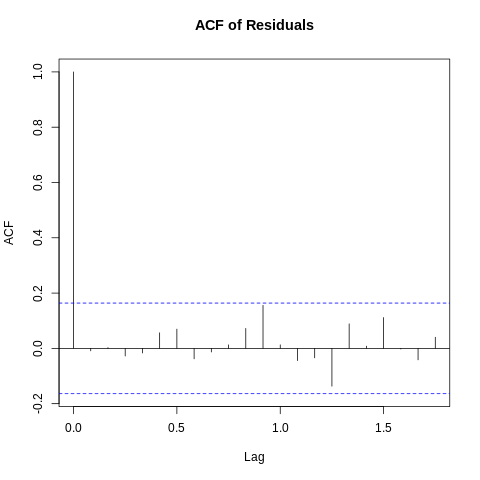

In [ ]:
%%R
# f Residual Diagnostics
# ACF or residuals
acf(residuals(fit), main="ACF of Residuals")

# Interpretation: White Noise Check: No significant spikes.

# Box Pierce Test
Box.test(residuals(fit), lag=20, type="Ljung-Box")

# Interpretation: p-value > 0.05 → residuals are white noise.


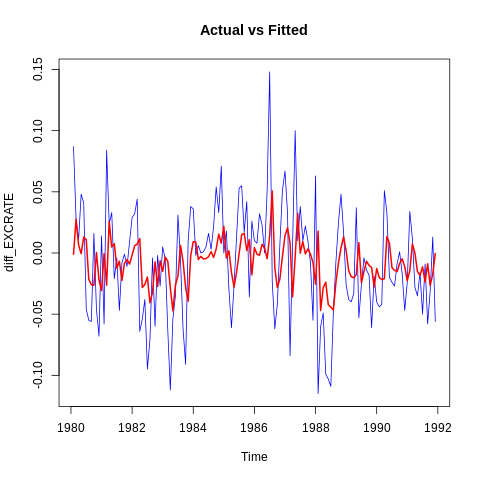

In [ ]:
%%R

# g Model Fit Evaluation
# Actual vs. Fitted Plot:
plot(diff_EXCRATE, col="blue", type="l", main="Actual vs Fitted")
lines(fitted(fit), col="red", lwd=2)

# Interpretation:

In [ ]:
%%R
# MAPE
residuals <- diff_EXCRATE - fitted(fit)
mape <- mean(abs(residuals/diff_EXCRATE) * 100)
cat("MAPE:", mape, "\n")

# Interpretation:


MAPE: Inf 


In [ ]:
%%R
# h One-Step Ahead Forecast (Period 145)
forecast(fit, h=1)$mean

# i Long-Term Forecast Behavior
# Interpretation:For stationary AR models, forecasts converge to the mean μ

             Jan
1992 -0.02561378


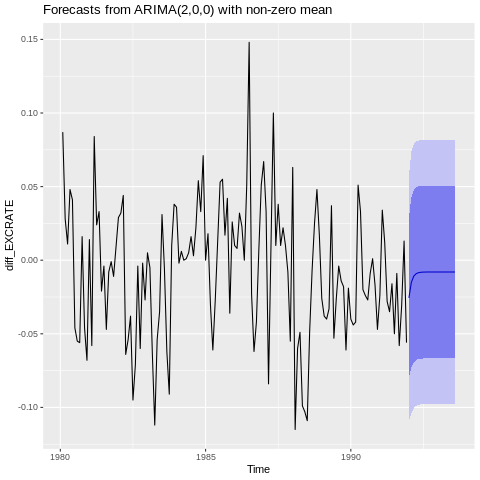

In [ ]:
%%R
# j 20-Period Ahead Forecast Plot
autoplot(forecast(fit, h=20))

# Interpretation: Forecasts will stabilize around the mean